# Metodo Multinomial Naive Bayes

En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los ​csv se encuentra en la carpeta ​dump dentro del proyecto. Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras. En base a esta información, se genera un modelo generativo que pueda predecir el
género de una canción a partir de la letra de una canción. Existen 4 géneros que se registran en la base de datos, por lo que para este analisis trabajaremos con un Multinomial Naive Bayes.

## Preparamos el ambiente de trabajo

- Importando los módulos `​numpy​`, `​pandas​`, `​matplotlib​`, `​seaborn​`, `​glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump.
- Para ello se genera un objeto que guarde en una lista todos los archivos alojados en ​dump utilizando `​glob.glob` y ​`os.getcwd()` para extraer las rutas absolutas. Posteriormente se genera un objeto `​pd.DataFrame`​ que contenga todos los `​csv​`.
- Se debe asegurar la extracción la columna `Unnamed: 0` que se genera por defecto.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [20]:
# Obtener la ruta actual
ruta_actual = os.getcwd()

# Crear una lista para almacenar los archivos CSV
archivos_csv = []

# Utilizar glob para obtener los archivos CSV en la carpeta actual y subcarpetas
ruta_archivos = os.path.join(ruta_actual, '**', '*.csv')
archivos_csv = glob.glob(ruta_archivos, recursive=True)

# Crear un DataFrame vacío
df = pd.DataFrame()

# Leer cada archivo CSV y agregarlo al DataFrame
for archivo_csv in archivos_csv:
    df_temp = pd.read_csv(archivo_csv)
    df = df.append(df_temp, ignore_index=True)

# Imprimir el DataFrame resultante
print(df)

C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppDa

     Unnamed: 0        0      1                                    2  \
0             0  Anthrax  metal                           Deathrider   
1             1  Anthrax  metal                  Metal Thrashing Mad   
2             2  Anthrax  metal                         I'm Eighteen   
3             3  Anthrax  metal                                Panic   
4             4  Anthrax  metal                           Subjugator   
...         ...      ...    ...                                  ...   
9484        246   Weezer   rock  Thief, You've Taken All That Was Me   
9485        247   Weezer   rock                   We Are All In Love   
9486        248   Weezer   rock                       We Go Together   
9487        249   Weezer   rock                 What Is This I Find?   
9488        250   Weezer   rock                             Zep Jamb   

                                                      3  
0     Riding hard, high in the saddle \n Winged stee...  
1     Racing down t

C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\2164437834.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=True)
C:\Users\javit\AppDa

In [21]:
df.drop('Unnamed: 0',axis=1)

,0,1,2,3
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...
9484,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
9485,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
9486,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
9487,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


In [32]:
sng = df.groupby('0', as_index= False)

## Realizar una descripción de los datos

- Utilizando el objeto creado en la preparación de los datos, se genera dos gráficos de barras que resumen la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenados de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
- Comentando sobre las principales tendencias.

Eminem               493
Bruce Springsteen    467
Bob Dylan            447
Britney Spears       323
Nicki Minaj          282
                    ... 
Dua Lipa              29
Lorde                 27
Black Star            23
Necrophagist          16
Gorgoroth             16
Name: 0, Length: 61, dtype: int64


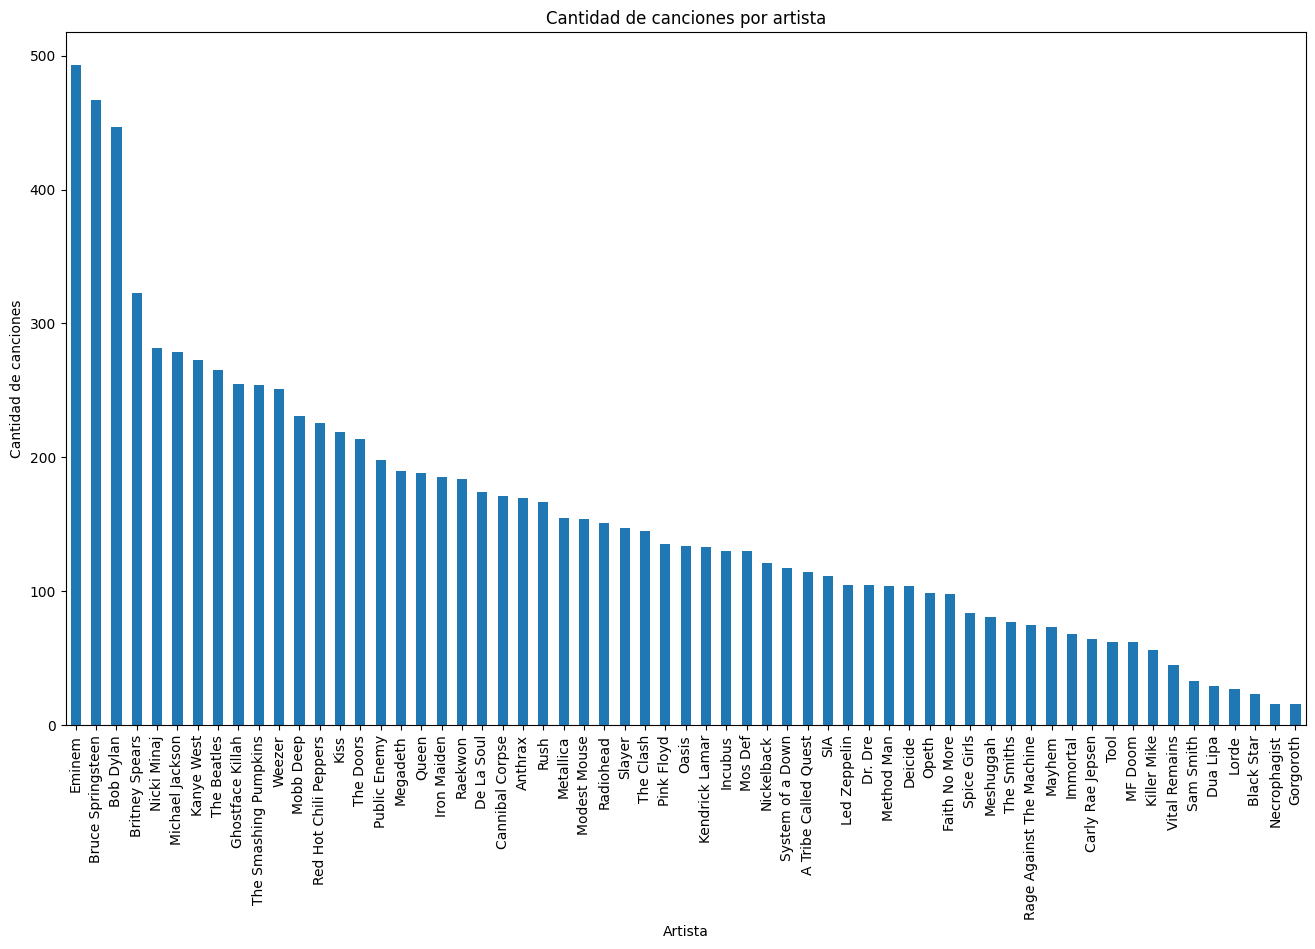

In [24]:
# Calcular la cantidad de canciones por artista
canciones_por_artista = df['0'].value_counts().sort_values(ascending=False)
print(canciones_por_artista)

# Crear el gráfico de barras
plt.figure(figsize=(16, 9))  # Tamaño de la figura
canciones_por_artista.plot(kind='bar')

# Personalizar el gráfico
plt.title('Cantidad de canciones por artista')
plt.xlabel('Artista', )
plt.ylabel('Cantidad de canciones')

# Mostrar el gráfico
plt.show()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: 1, dtype: int64


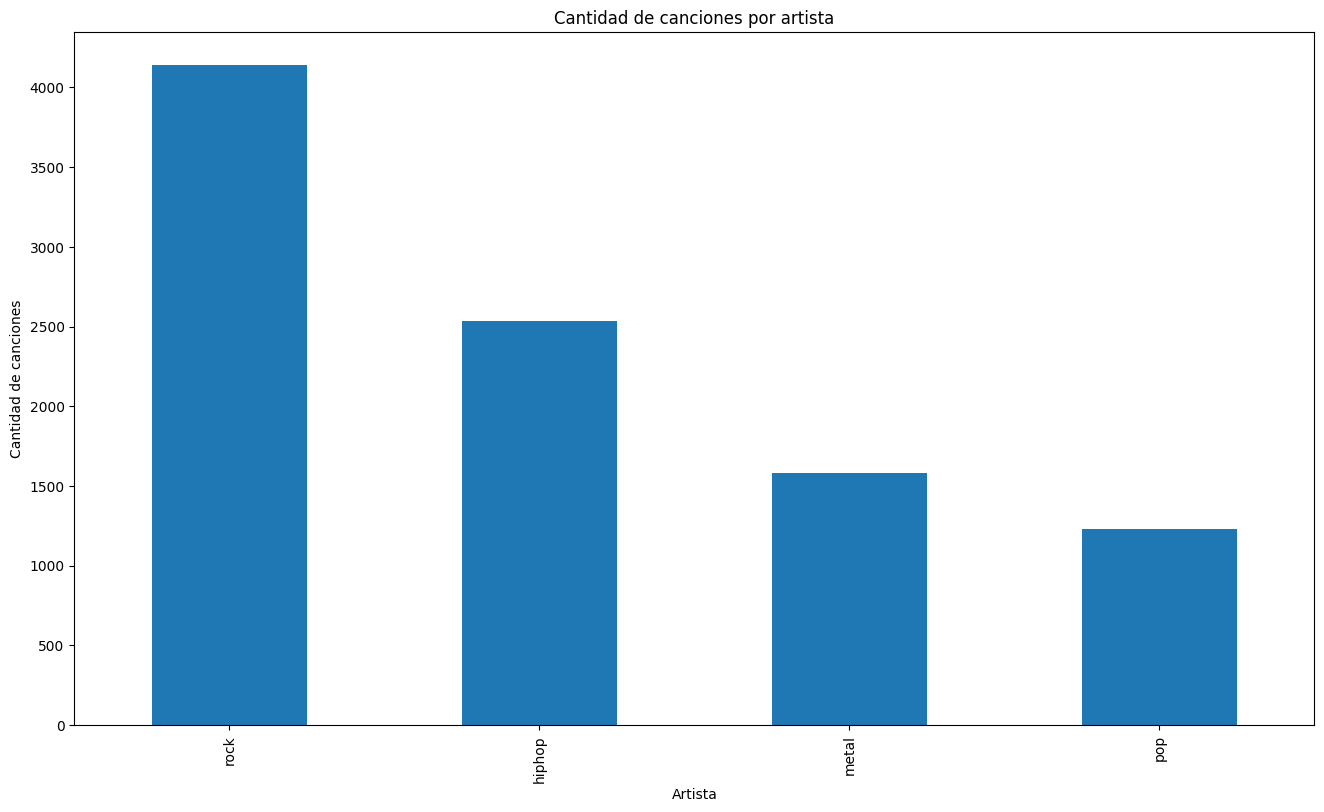

In [25]:
# Calcular la cantidad de canciones por artista
canciones_por_genero = df['1'].value_counts().sort_values(ascending=False)
print(canciones_por_genero)

# Crear el gráfico de barras
plt.figure(figsize=(16, 9))  # Tamaño de la figura (opcional)
canciones_por_genero.plot(kind='bar')

# Personalizar el gráfico
plt.title('Cantidad de canciones por artista')
plt.xlabel('Artista')
plt.ylabel('Cantidad de canciones')

# Mostrar el gráfico
plt.show()


Podemos observar, que la mayor tendencia en el apartado de los artistas se genera para el artista "Eminem" con un numero de 493 canciones registradas, por otra parte, en el apartado de género musical según los datos obtenidos, la mayor cantidad de canciones registrada es de 4140 en el género de "rock".

## Creación de matriz de ocurrencias

Se utiliza la **Tokenización de Textos**
Para poder trabajar con textos, debemos pasarlos a una **​matriz dispersa**​, donde cada fila representará una entrada (en este caso, una canción), y cada columna **​representará una palabra (token)**​. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple `​sklearn.feature_extraction.text.CountVectorizer` genera una colección de textos a una matriz que representa la frecuencia **​dentro del texto** de una palabra específica.

El tokenizador funciona de la siguiente manera:

```python	
from​ sklearn.feature_extraction.text ​import​ CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words=​'english'​)
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(lista_de_textos)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=​0​)
```
- Importe la clase `​CountVectorizer` dentro de los módulos `​feature_extraction.text` de la librería `​sklearn​`. recomiendo leer la documentación asociada a este, siendo nuestro vector obejetivo la columna 3 de nuestro DataFrame.
- Aplicamos la clase para extraer las 100 palabras más repetidas en toda la base de datos.
- Generamos una función que replique el procedimiento para cada uno de los géneros.

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Aplicar CountVectorizer a las letras de canciones
letras = df['3']
count_vectorizer_fit = count_vectorizer.fit_transform(letras)

# Obtener las palabras (tokens)
Palabra = count_vectorizer.get_feature_names_out()

# Obtener la frecuencia de las palabras
Palabra_freq = count_vectorizer_fit.toarray().sum(axis=0)

# Crear un DataFrame con las palabras y su frecuencia
df_words_freq = pd.DataFrame({'Palabra': Palabra, 'Frecuencia': Palabra_freq})

# Ordenar el DataFrame por frecuencia en orden descendente
df_words_freq = df_words_freq.sort_values(by='Frecuencia', ascending=False)

# Obtener las 100 palabras más repetidas
top_100_letras = df_words_freq.head(100)

print(top_100_letras)


      Palabra  Frecuencia
24950    like       19629
12859     don       17398
23856    know       14962
18439     got       14171
23287    just       13978
...       ...         ...
11041   death        1897
24615    left        1895
43442   thing        1882
14305     end        1829
41068    stay        1828

[100 rows x 2 columns]


Estas son las 100 palabras mas repetidas en toda la base de datos.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia de CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Obtener la lista de géneros únicos en el DataFrame
generos = df['1'].unique()

# Iterar sobre cada género y obtener las palabras más repetidas
for genero in generos:
    # Filtrar el DataFrame por el género actual
    df_genero = df[df['1'] == genero]
    
    # Obtener las letras de canciones del género actual
    letras_genero = df_genero['3']
    
    # Aplicar CountVectorizer a las letras del género actual
    count_vectorizer_fit = count_vectorizer.fit_transform(letras_genero)
    
    # Obtener las palabras (tokens)
    words = count_vectorizer.get_feature_names_out()
    
    # Obtener la frecuencia de las palabras
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    # Crear un DataFrame con las palabras y su frecuencia
    df_words_freq = pd.DataFrame({'Palabra': words, 'Frecuencia': words_freq})
    
    # Ordenar el DataFrame por frecuencia en orden descendente
    df_words_freq = df_words_freq.sort_values(by='Frecuencia', ascending=False)
    
    # Obtener las 100 palabras más repetidas del género actual
    top_100_words = df_words_freq.head(100)
    
    # Imprimir el género actual y las palabras más repetidas
    print(f"Género: {genero}")
    print(top_100_words)
    print()



Género: metal
      Palabra  Frecuencia
7883     life        1233
4088      don        1181
3284    death        1139
13844    time        1096
7977       ll        1069
...       ...         ...
13839    till         215
5939     good         214
11666    save         213
13041    stop         211
8034     lord         210

[100 rows x 2 columns]

Género: hiphop
      Palabra  Frecuencia
18361    like       12055
13533     got        7613
9466      don        7604
17532    know        6535
17082    just        6272
...       ...         ...
31521    talk         823
18961      ma         821
34088   verse         820
5866   chorus         811
3911     bout         808

[100 rows x 2 columns]

Género: rock
      Palabra  Frecuencia
5282      don        5284
10362    love        5114
9697     know        4702
12077      oh        4258
20056    yeah        4157
...       ...         ...
18247    town         558
6337     fall         548
14819   round         548
4527     days         54

## Generacion de un modelo predictivo

**`​sklearn​` Pipelines**

La clase `​Pipeline` del módulo `​sklearn.pipeline` permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de `scikit-learn`​. En sí, la clase cuenta con los métodos clásicos `​fit​`, `​predict`, `​score` y presenta un comportamiento idéntico a los demás objetos de `​scikit-learn`​. Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.

**Componentes de un `​Pipeline`**

Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo **​Estandarizar​**, posteriormente **​extraer sus principales componentes** y finalmente aplicar un modelo de **​regresión lineal**​. Este flujo se puede reexpresar como:

```python
pipeline_model = Pipeline([(​'scale'​, StandardScaler()),
                (​'pca'​, RandomizedPCA(n_components=​3​)),
                (​'model'​, LinearRegression())])
```

Algunos de los elementos a considerar:

1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que asociamos el método `​StandardScaler​` con el string `​scale​`.
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso representa el orden de ejecución.

Posteriormente el objeto creado puede utilizarse con los siguientes métodos
```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```

- Se importa `​MultinomialNB`​, `​train_test_split​`, `​Pipeline​`, `​confusion_matrix` y `classification_report​`.
- Se genera las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
- Se monta el modelo dentro de un `​Pipeline​`, donde el primer paso es implementar `CountVectorizer​` y el segundo es ejecutar el clasificador `​MultinomialNB​`.
- A continuación se les presenta una lista de letras, veamos las predicciones resultantes.

```python
[​
"I got a place in the underworld"​, ​# Brody Dalle - Underworld
"As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara"​, ​# Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie"​, ​# N'SYNC - Bye Bye Bye
"Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way"​, ​# Ludacris - Move B*tch
"Sexual violence doesn'​t start ​and​ end ​with​ rape It starts ​in​ our books ​and behind our school gates​" # IDLES - Mother,
"Take it from the girl you claimed to\ love You gonna get some bad karma I'​m the one who had to learn to build a heart made of armor From the girl who made you soup ​and​ tied your shoes when you were hurting\ You are ​not​ deserving, you are ​not​ deserving​" #Banks - Drowning
]
``` 
- Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Dividir los datos en entrenamiento y validación
X = df['3']
y = df['1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7098)

# Crear el Pipeline con CountVectorizer y MultinomialNB
pipeline_model = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),
    ('naive_bayes', MultinomialNB())
])

# Entrenar el modelo
pipeline_model.fit(X_train, y_train)

# Lista de letras para predecir el género
letras_prediccion = [
    "I got a place in the underworld",  # Brody Dalle - Underworld
    "As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara",  # Gorguts - Forgotten Arrows
    "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",  # N'SYNC - Bye Bye Bye
    "Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way",  # Ludacris - Move B*tch
    "Sexual violence doesn't start and end with rape It starts in our books and behind our school gates",  # IDLES - Mother
    "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving"  # Banks - Drowning
]

# Predecir el género de las canciones de la lista
predicciones = pipeline_model.predict(letras_prediccion)

# Reporte de métricas utilizando los datos de validación
y_pred = pipeline_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 940    5   16   51]
 [  21  426   11  147]
 [  66    5  189  248]
 [  59   73   62 1477]]
              precision    recall  f1-score   support

      hiphop       0.87      0.93      0.90      1012
       metal       0.84      0.70      0.76       605
         pop       0.68      0.37      0.48       508
        rock       0.77      0.88      0.82      1671

    accuracy                           0.80      3796
   macro avg       0.79      0.72      0.74      3796
weighted avg       0.79      0.80      0.79      3796



## Ejercicio 5: Mejora del Modelo

- Se propone una estrategia para mejorar el desempeño del modelo en la categoría con peores métricas.
- Se repiten los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos datos suministrados.
- Comente sobre el desempeño general de este.

Se propone utilizar mas datos dentro de la columna de pop, esto a través de la implentación de mas archivos .csv dentro de la lista de pop.

In [56]:
# Obtener la ruta y carpeta actual
ruta_actual = os.getcwd()
carpeta_actual = os.path.dirname(ruta_actual)

# Crear una lista para almacenar los archivos CSV
archivos_csv = []

# Utilizar glob para obtener los archivos CSV en la carpeta "dump"
ruta_archivos_dump = os.path.join(ruta_actual, '**', '*.csv')
archivos_csv += glob.glob(ruta_archivos_dump, recursive=True)

# Utilizar glob para obtener los archivos CSV en la carpeta "dump_plus_pop"
ruta_archivos_dump_plus_pop = os.path.join(carpeta_actual, 'dump_plus_pop', '**', '*.csv')
archivos_csv += glob.glob(ruta_archivos_dump_plus_pop, recursive=True)

# Crear un DataFrame vacío
df_mejora = pd.DataFrame()

# Leer cada archivo CSV y agregarlo al DataFrame
for archivo_csv in archivos_csv:
    df_temp = pd.read_csv(archivo_csv)
    df_mejora = df_mejora.append(df_temp, ignore_index=True)

# Imprimir el DataFrame resultante
print(df_mejora)


C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora

      Unnamed: 0        0      1                                    2  \
0              0  Anthrax  metal                           Deathrider   
1              1  Anthrax  metal                  Metal Thrashing Mad   
2              2  Anthrax  metal                         I'm Eighteen   
3              3  Anthrax  metal                                Panic   
4              4  Anthrax  metal                           Subjugator   
...          ...      ...    ...                                  ...   
20288        246   Weezer   rock  Thief, You've Taken All That Was Me   
20289        247   Weezer   rock                   We Are All In Love   
20290        248   Weezer   rock                       We Go Together   
20291        249   Weezer   rock                 What Is This I Find?   
20292        250   Weezer   rock                             Zep Jamb   

                                                       3  
0      Riding hard, high in the saddle \n Winged stee...  
1    

C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora.append(df_temp, ignore_index=True)
C:\Users\javit\AppData\Local\Temp\ipykernel_8548\1965518843.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_mejora = df_mejora.append(df_temp, ignore_index=True)


Con lo anterior repetimos los pasos de limpieza y analisis para rectificar que todos los datos esten en orden.

In [57]:
df_mejora.drop('Unnamed: 0',axis=1)

,0,1,2,3
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...
20288,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
20289,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
20290,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
20291,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


rock      8280
hiphop    5070
pop       3779
metal     3164
Name: 1, dtype: int64


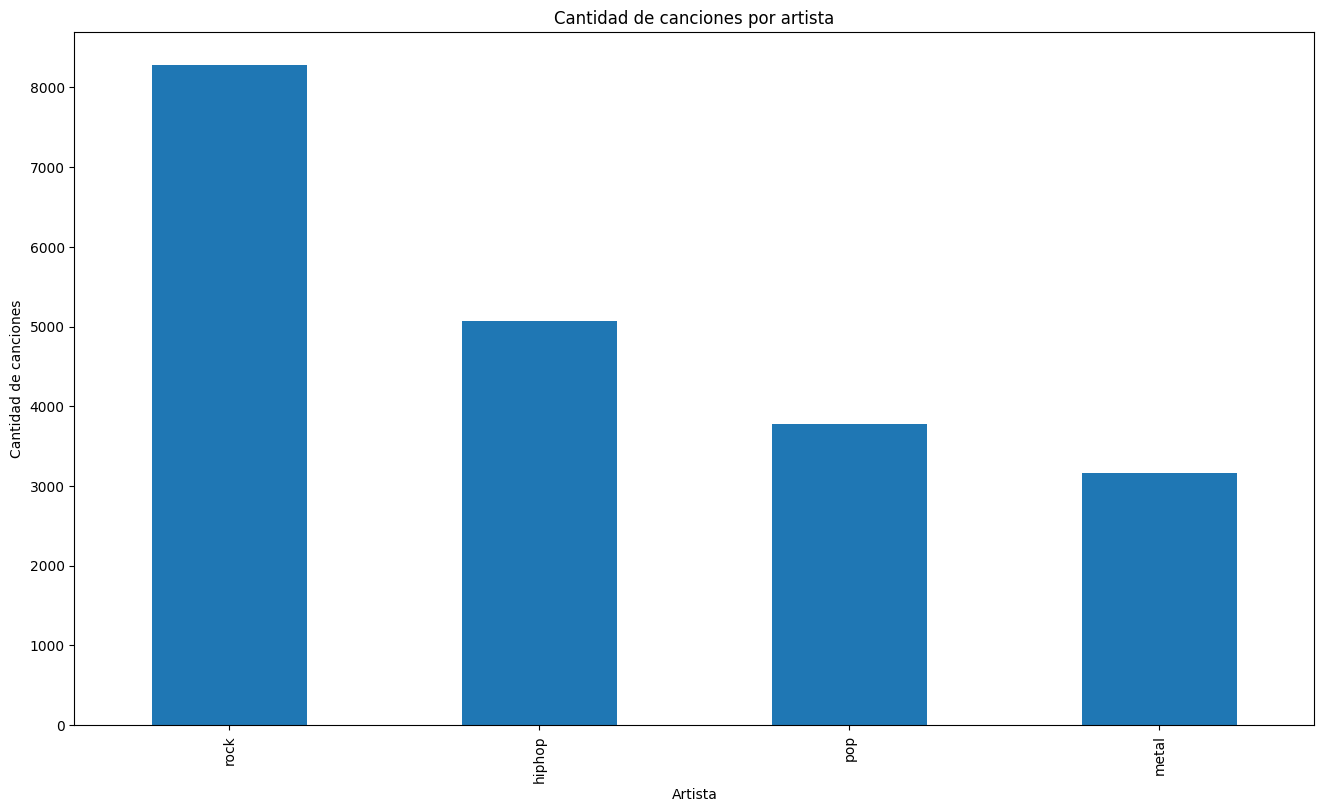

In [55]:
# Calcular la cantidad de canciones por artista
canciones_por_genero = df_mejora['1'].value_counts().sort_values(ascending=False)
print(canciones_por_genero)

# Crear el gráfico de barras
plt.figure(figsize=(16, 9))  # Tamaño de la figura (opcional)
canciones_por_genero.plot(kind='bar')

# Personalizar el gráfico
plt.title('Cantidad de canciones por artista')
plt.xlabel('Artista')
plt.ylabel('Cantidad de canciones')

# Mostrar el gráfico
plt.show()


Con esto corroboramos que esta todo en órden, por lo tanto podemos realizar la predicción y ver si mejoran nuestras metricas.

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Dividir los datos en entrenamiento y validación
X = df_mejora['3']
y = df_mejora['1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7098)

# Crear el Pipeline con CountVectorizer y MultinomialNB
pipeline_model = Pipeline([
    ('count_vectorizer', CountVectorizer(stop_words='english')),
    ('naive_bayes', MultinomialNB())
])

# Entrenar el modelo
pipeline_model.fit(X_train, y_train)

# Lista de letras para predecir el género
letras_prediccion = [
    "I got a place in the underworld",  # Brody Dalle - Underworld
    "As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara",  # Gorguts - Forgotten Arrows
    "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie",  # N'SYNC - Bye Bye Bye
    "Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way",  # Ludacris - Move B*tch
    "Sexual violence doesn't start and end with rape It starts in our books and behind our school gates",  # IDLES - Mother
    "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving"  # Banks - Drowning
]

# Predecir el género de las canciones de la lista
predicciones = pipeline_model.predict(letras_prediccion)

# Reporte de métricas utilizando los datos de validación
y_pred = pipeline_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1887   16   83   66]
 [  24  995   19  211]
 [  97   17 1051  348]
 [  62  130  318 2794]]
              precision    recall  f1-score   support

      hiphop       0.91      0.92      0.92      2052
       metal       0.86      0.80      0.83      1249
         pop       0.71      0.69      0.70      1513
        rock       0.82      0.85      0.83      3304

    accuracy                           0.83      8118
   macro avg       0.83      0.81      0.82      8118
weighted avg       0.83      0.83      0.83      8118



Observamos que el resultado de las metricas al incluir la mejora se vuelve significativamente mejor, por lo que podemos decir que el fallo del modelo anterior fue simplemente la falta de datos.